In [55]:
import numpy as np
import pandas as pd
import os
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
from wordcloud import WordCloud
from matplotlib import rc
rc('font', family='Malgun othic')
plt.rcParams['axes.unicode_minus'] = False

# 브라우저에서 바로 이미지를 그린다.
import seaborn as sns
from wordcloud import WordCloud


In [45]:
# 폰트 확인
import matplotlib.font_manager as fonm
font_list = [font.name for font in fonm.fontManager.ttflist]
for f in font_list:
    print(f"{f}.ttf")

DejaVu Sans Mono.ttf
DejaVu Serif.ttf
cmss10.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
cmb10.ttf
DejaVu Sans.ttf
DejaVu Sans Mono.ttf
STIXSizeTwoSym.ttf
cmmi10.ttf
STIXSizeThreeSym.ttf
STIXNonUnicode.ttf
DejaVu Serif.ttf
DejaVu Sans Display.ttf
cmsy10.ttf
STIXSizeFiveSym.ttf
STIXSizeOneSym.ttf
STIXSizeTwoSym.ttf
STIXSizeThreeSym.ttf
STIXNonUnicode.ttf
STIXSizeFourSym.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
STIXNonUnicode.ttf
DejaVu Sans Mono.ttf
cmr10.ttf
cmex10.ttf
DejaVu Serif Display.ttf
STIXSizeFourSym.ttf
STIXSizeOneSym.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
DejaVu Sans Mono.ttf
DejaVu Sans.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
STIXGeneral.ttf
cmtt10.ttf
Franklin Gothic Book.ttf
Microsoft YaHei.ttf
Headline R.ttf
Lucida Console.ttf
Malgun Gothic.ttf
Bell MT.ttf
Californian FB.ttf
Franklin Gothic Heavy.ttf
Wingdings.ttf
Palatino Linotype.ttf
Wide Latin.ttf
Bodoni MT.ttf
Bodoni MT.ttf
Malgun Gothic.ttf
Yet R.ttf
Batang.ttf
Niagara Engraved.ttf
Chiller.ttf
Bodoni MT.ttf
Gill Sans Ultra Bold.tt

In [46]:
path = 'C:\Windows\Fonts\Malgun Gothic.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

In [19]:
!pip install WordCloud

In [20]:
# 데이터 크기 확인
DATA_IN_PATH = './data_in/'

In [21]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings.txt                   19.72MB
ratings_test.txt              4.94MB
ratings_train.txt             14.78MB


In [22]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [23]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 150000


In [24]:
# document 리뷰 문자 길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

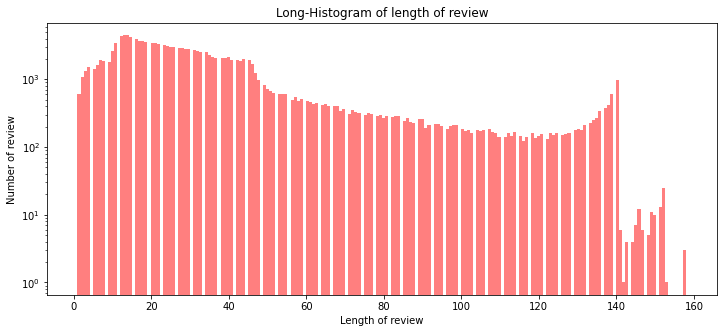

In [25]:
# 전체 길이 히스토그램 시각화
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize = (12, 5))
# 히스토그램 선언
# bins:  히스토그램 값에 대한 버킷 범위
# range: x 축 값의 범위
# alpha : 그래프 색상 투명도
# color : 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Long-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y축 라벨
plt.ylabel('Number of review')
    

In [26]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.23749333333333
리뷰 길이 표준편차: 29.582262651516178
리뷰 길이 중간값: 27.0


In [27]:
# 사분위 경우 0~100 스케일로 돼 있음
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x226c79cd5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x226c776a550>,
 'boxes': [<matplotlib.lines.Line2D at 0x226c82a4cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x226c72d7470>],
 'fliers': [<matplotlib.lines.Line2D at 0x226c7046ac8>],
 'means': [<matplotlib.lines.Line2D at 0x226c71965c0>]}

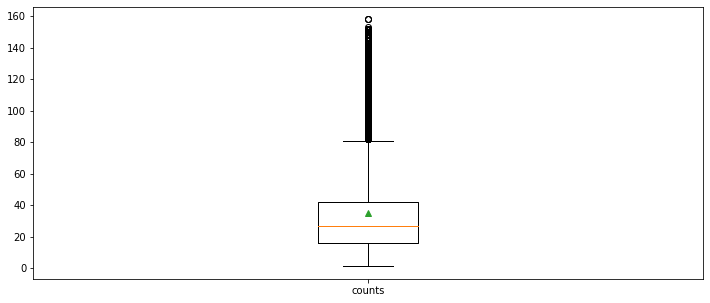

In [28]:
plt.figure(figsize=(12,5))
# 박스 플롯 생성
# 첫 번째 파라미터: 여러 분포에 대한 데이터 리스트를 입력
# labels:입력한 데이터에 대한 라벨
# showmeans: 평균 값을 마크함
plt.boxplot(train_length, labels=['counts'], showmeans=True)

### 어휘 빈도 분석 ###

In [29]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]

In [ ]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
plt.im